<a href="https://colab.research.google.com/github/CarloGrigioni/CarloGrigioni.github.io/blob/main/Syntethic_XAI_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP and Synthetic Data

# Train real - explain real

In [ ]:
%%capture
!pip install -q shap

In [ ]:
%%capture
!pip install -q sdv

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import shap
import warnings
from sdv.tabular import GaussianCopula, CopulaGAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
features = data.feature_names

FixedFormatter should only be used together with FixedLocator


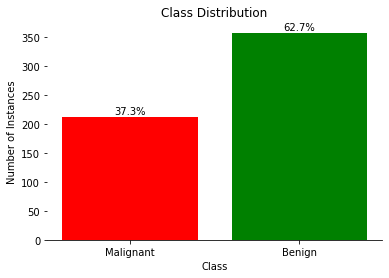

In [ ]:
class_counts = np.bincount(y)
class_percentages = class_counts / len(y) * 100

# Plot the class distribution as a bar plot with percentages
fig, ax = plt.subplots()
ax.bar(['Malignant', 'Benign'], class_counts, color=['red', 'green'])
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Instances')
ax.set_xticklabels(['Malignant', 'Benign'], rotation=0)
for i, v in enumerate(class_percentages):
    ax.text(i, class_counts[i] + 5, '{:.1f}%'.format(v), ha='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train = pd.DataFrame(X_train, columns = features)
X_test = pd.DataFrame(X_test, columns = features)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.972


In [ ]:
model_xgb = xgb.XGBClassifier(random_state=42)

model_xgb.fit(X_train.values, y_train)

y_pred = model_xgb.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.958


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


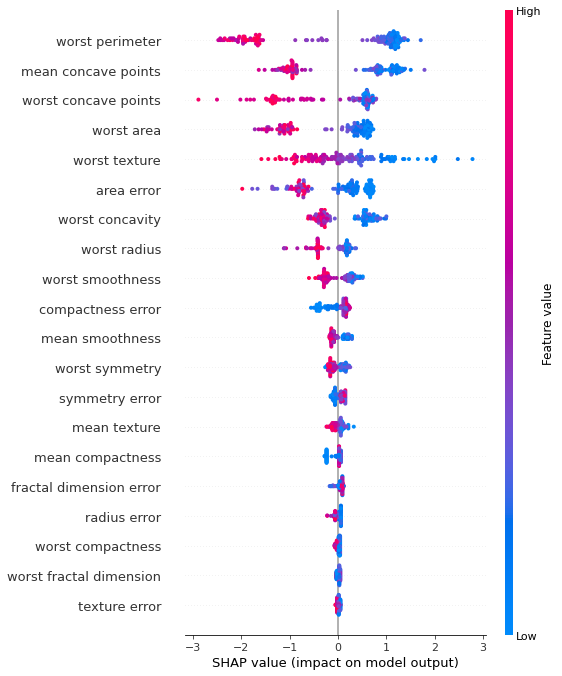

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Train Real - Explain  Synthetic

## Syntethic Data Generation with The Synthetic Data Vault (SDV)

In [ ]:
X_df = pd.DataFrame(X)

In [ ]:
X_df.columns

RangeIndex(start=0, stop=30, step=1)

In [ ]:
X_df = pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])

In [ ]:
X_df['target'] = y

In [ ]:
model = GaussianCopula()
model.fit(X_df)

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


In [ ]:
synthetic_data = model.sample(len(X_df))

In [ ]:
synthetic_data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,7.717,23.18,49.33,170.9,0.09971,0.06171,0.068599,0.021532,0.1718,0.06577,...,29.54,60.75,251.7,0.13874,0.20110,0.224666,0.050430,0.2374,0.10129,1
1,12.724,13.11,82.07,440.4,0.09951,0.09040,0.084751,0.048355,0.1651,0.06326,...,17.67,85.58,484.5,0.13736,0.20878,0.248387,0.159562,0.2650,0.09473,1
2,16.096,18.49,104.30,828.4,0.09727,0.11016,0.085004,0.049648,0.1476,0.06332,...,25.97,134.66,1424.1,0.13813,0.27599,0.238387,0.110947,0.2516,0.08657,0
3,18.867,19.43,125.51,1113.3,0.10463,0.17075,0.118412,0.079488,0.1707,0.06312,...,27.58,142.89,1493.7,0.15065,0.46511,0.321707,0.184767,0.3041,0.09226,0
4,14.585,17.81,96.65,697.0,0.10758,0.15431,0.101028,0.060758,0.2264,0.06470,...,21.63,107.69,783.1,0.13137,0.25345,0.157277,0.121779,0.3046,0.07387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,7.806,20.69,49.63,172.1,0.09913,0.06721,0.009355,0.007180,0.1409,0.06593,...,26.61,52.68,199.1,0.13153,0.08087,0.008022,0.005755,0.1880,0.07111,1
565,11.085,22.27,69.75,334.9,0.09294,0.05913,0.035258,0.015229,0.1653,0.06309,...,30.22,81.83,529.9,0.15252,0.19132,0.129391,0.052619,0.2583,0.08472,1
566,14.809,17.59,94.34,653.4,0.08874,0.04496,0.027454,0.026089,0.1312,0.05977,...,22.52,102.50,816.0,0.11835,0.09687,0.073904,0.056208,0.1971,0.06505,1
567,17.174,19.86,112.94,906.4,0.09221,0.16669,0.113842,0.052224,0.1934,0.06236,...,24.87,143.03,1379.7,0.11401,0.37984,0.335721,0.142159,0.2883,0.07478,0


## Explain

Use previously trained xgb on syntethic data

> Indented block



In [ ]:
y_sdv = synthetic_data['target']
X_sdv = synthetic_data.drop('target', axis=1)

In [ ]:
X_train_sdv, X_test_sdv, y_train_sdv, y_test_sdv = train_test_split(X_sdv, y_sdv)

In [ ]:
model_xgb_s = xgb.XGBClassifier(random_state=42)
model_xgb_s.fit(X_train_sdv, y_train_sdv)
y_pred = model_xgb_s.predict(X_test_sdv)
accuracy = accuracy_score(y_test_sdv, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.755


In [ ]:
X_test_sdv.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29'],
      dtype='object')

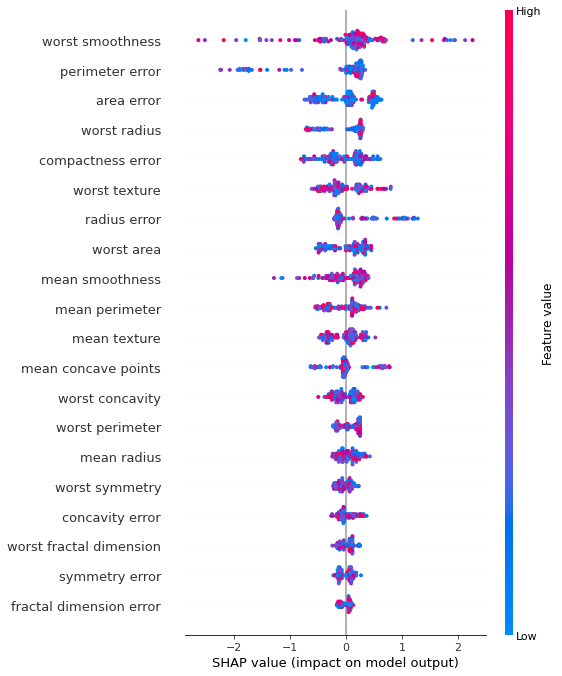

In [ ]:
explainer = shap.TreeExplainer(model_xgb_s)
shap_values = explainer.shap_values(X_test_sdv)
shap.summary_plot(shap_values, X_test)

## Aug

In [ ]:
synthetic_data_aug = model.sample(2*len(X_df))

In [ ]:
synthetic_data_aug

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,15.073,20.04,95.79,735.0,0.09287,0.03157,0.017369,0.018083,0.1579,0.05984,...,27.89,103.12,934.5,0.13113,0.04843,0.041674,0.037698,0.2034,0.06155,1
1,19.158,19.79,125.56,1184.4,0.11962,0.15039,0.225829,0.119225,0.2013,0.06301,...,24.57,170.54,2152.6,0.17626,0.34542,0.588659,0.282131,0.3349,0.08371,0
2,16.548,20.61,108.95,851.8,0.09988,0.15384,0.149364,0.077002,0.1739,0.06255,...,25.17,124.64,1208.0,0.13737,0.35805,0.401523,0.151824,0.2547,0.08956,0
3,14.732,29.52,94.67,628.3,0.09328,0.08400,0.092606,0.053245,0.1801,0.06157,...,35.28,117.19,1026.5,0.13353,0.21251,0.216722,0.115509,0.2991,0.07148,0
4,13.922,21.29,87.91,611.0,0.08103,0.02224,0.021132,0.018750,0.1148,0.05999,...,27.03,94.51,710.6,0.11763,0.05345,0.073448,0.057343,0.1849,0.06167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,14.584,24.31,96.19,700.9,0.10630,0.15278,0.135637,0.056496,0.1924,0.06302,...,35.79,116.80,1013.4,0.17167,0.47401,0.481477,0.171873,0.3754,0.08992,0
1134,12.754,17.14,80.87,480.0,0.08947,0.04151,0.037826,0.019483,0.1857,0.06173,...,24.82,89.64,661.0,0.11120,0.13355,0.103993,0.044157,0.3427,0.07518,1
1135,16.402,14.32,107.75,863.0,0.08838,0.09364,0.071342,0.044166,0.1850,0.06321,...,18.37,136.34,1359.7,0.10193,0.13932,0.155741,0.094032,0.2539,0.07953,1
1136,9.671,18.42,59.50,243.1,0.07396,0.02242,0.007152,0.003348,0.1406,0.05947,...,23.36,64.72,299.6,0.09583,0.07455,0.058470,0.014108,0.2472,0.06099,1


In [ ]:
y_sdv_aug = synthetic_data_aug['target']
X_sdv_aug = synthetic_data_aug.drop('target', axis=1)

In [ ]:
y_pred = model_xgb_s.predict(X_sdv_aug)

accuracy = accuracy_score(y_sdv_aug, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.806


In [ ]:
X_train_sdv_aug, X_test_sdv_aug, y_train_sdv_aug, y_test_sdv_aug = train_test_split(X_sdv_aug, y_sdv_aug)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


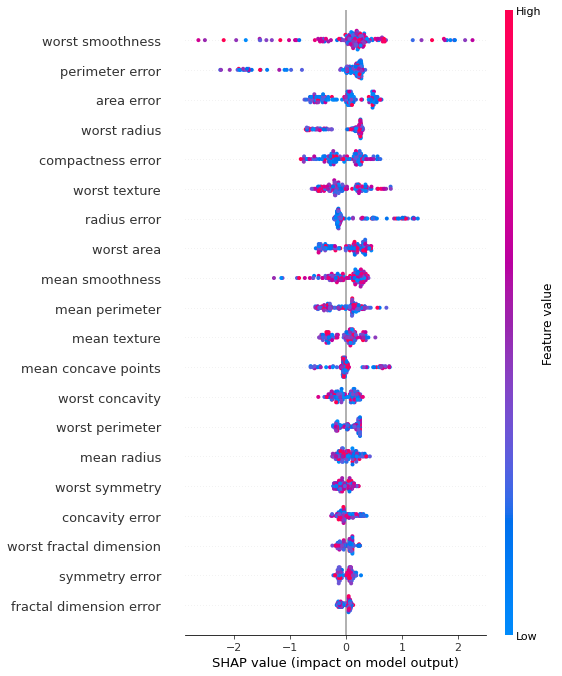

In [ ]:
explainer = shap.TreeExplainer(model_xgb_s)
shap_values = explainer.shap_values(X_test_sdv)
shap.summary_plot(shap_values, X_test)

# Global Surrogate

In [ ]:
model_surr_tree = DecisionTreeClassifier(random_state=0, max_depth=2).fit(X_train_sdv_aug,y_train_sdv_aug)
y_pred = model_surr_tree.predict(X_test_sdv_aug)
r2 = r2_score(model_xgb_s.predict(X_test_sdv_aug), y_pred)
print(f'r squared score: {r2:.3f}')

r squared score: 0.552


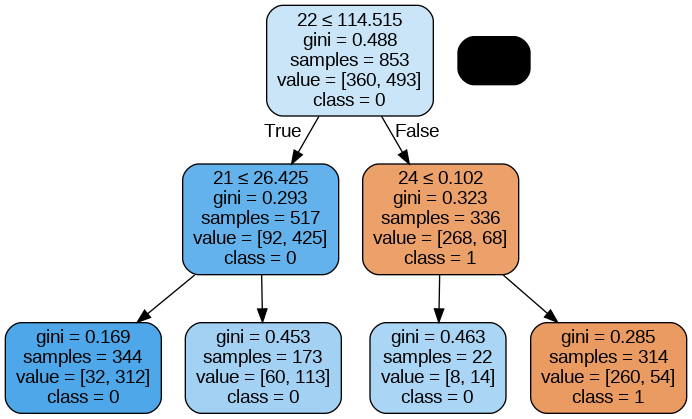

In [ ]:
# Export the decision tree to a dot file
dot_data = export_graphviz(model_surr_tree, out_file=None, 
                           feature_names=X_train_sdv.columns,
                           class_names=['1', '0'], 
                           filled=True, rounded=True,  
                           special_characters=True)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree as a png
Image(graph.create_png())

In [ ]:
used_f = [22, 21, 24]
for f in used_f:
  print(features[f])

worst perimeter
worst texture
worst smoothness


The synthetic model seems to  learning from the same features, using the perimeter as a surrogate for the radius.